In [14]:
import os
print(os.listdir())


['crime_combined.csv', '.DS_Store', 'crime_250_plus.csv', 'crime_100_250.csv', 'city_market.archive (6).zip', 'archive (6)', 'combine_datasets.ipynb', 'uszips.csv', 'food-inspections-validity-id.tsv', 'food-inspections.csv', 'merged_housing_crime.csv', 'city_market_tracker.tsv000', 'crime_60_100.csv', 'crime_40_60.csv']


## Data Cleaning

In [6]:
import pandas as pd
import glob

crime_files = glob.glob("crime_*.csv")
print("Crime files found:", crime_files)

crime_combined = pd.concat([pd.read_csv(f) for f in crime_files], ignore_index=True)
crime_combined.to_csv("crime_combined.csv", index=False)

print("✅ Combined crime datasets saved as 'crime_combined.csv'")
print("Total rows:", len(crime_combined))


Crime files found: ['crime_250_plus.csv', 'crime_100_250.csv', 'crime_60_100.csv', 'crime_40_60.csv']
✅ Combined crime datasets saved as 'crime_combined.csv'
Total rows: 975


In [7]:
import pandas as pd

# Load both datasets
crime = pd.read_csv("crime_combined.csv")
housing = pd.read_csv("city_market_tracker.tsv000", sep='\t')

In [10]:
import pandas as pd

housing = pd.read_csv("city_market_tracker.tsv000", sep='\t')
print(housing.columns)

Index(['PERIOD_BEGIN', 'PERIOD_END', 'PERIOD_DURATION', 'REGION_TYPE',
       'REGION_TYPE_ID', 'TABLE_ID', 'IS_SEASONALLY_ADJUSTED', 'REGION',
       'CITY', 'STATE', 'STATE_CODE', 'PROPERTY_TYPE', 'PROPERTY_TYPE_ID',
       'MEDIAN_SALE_PRICE', 'MEDIAN_SALE_PRICE_MOM', 'MEDIAN_SALE_PRICE_YOY',
       'MEDIAN_LIST_PRICE', 'MEDIAN_LIST_PRICE_MOM', 'MEDIAN_LIST_PRICE_YOY',
       'MEDIAN_PPSF', 'MEDIAN_PPSF_MOM', 'MEDIAN_PPSF_YOY', 'MEDIAN_LIST_PPSF',
       'MEDIAN_LIST_PPSF_MOM', 'MEDIAN_LIST_PPSF_YOY', 'HOMES_SOLD',
       'HOMES_SOLD_MOM', 'HOMES_SOLD_YOY', 'PENDING_SALES',
       'PENDING_SALES_MOM', 'PENDING_SALES_YOY', 'NEW_LISTINGS',
       'NEW_LISTINGS_MOM', 'NEW_LISTINGS_YOY', 'INVENTORY', 'INVENTORY_MOM',
       'INVENTORY_YOY', 'MONTHS_OF_SUPPLY', 'MONTHS_OF_SUPPLY_MOM',
       'MONTHS_OF_SUPPLY_YOY', 'MEDIAN_DOM', 'MEDIAN_DOM_MOM',
       'MEDIAN_DOM_YOY', 'AVG_SALE_TO_LIST', 'AVG_SALE_TO_LIST_MOM',
       'AVG_SALE_TO_LIST_YOY', 'SOLD_ABOVE_LIST', 'SOLD_ABOVE_LIST_MOM',
 

In [11]:
crime = crime.dropna(subset=["states", "cities"])
crime["cities"] = crime["cities"].str.strip().str.title()
housing["CITY"] = housing["CITY"].str.strip().str.title()

In [12]:
merged = pd.merge(housing, crime, left_on="CITY", right_on="cities", how="inner")


In [13]:
merged.to_csv("merged_housing_crime.csv", index=False)

print("✅ Cleaned and merged dataset saved as 'merged_housing_crime.csv'")
print("Total merged rows:", len(merged))

✅ Cleaned and merged dataset saved as 'merged_housing_crime.csv'
Total merged rows: 1258597


## Data Visualization

In [19]:
print([col for col in merged.columns if "crime" in col.lower()])


['total_crime', 'tot_violent_crime', 'violent_crime', 'prop_crime']


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/var/folders/cz/bkgdv10j5p71d4f721kbrdch0000gn/T/ipykernel_25585/2544066725.py:4: SyntaxWarning: invalid escape sequence '\$'
  merged[col] = merged[col].replace({',': '', '\$': ''}, regex=True).astype(float)


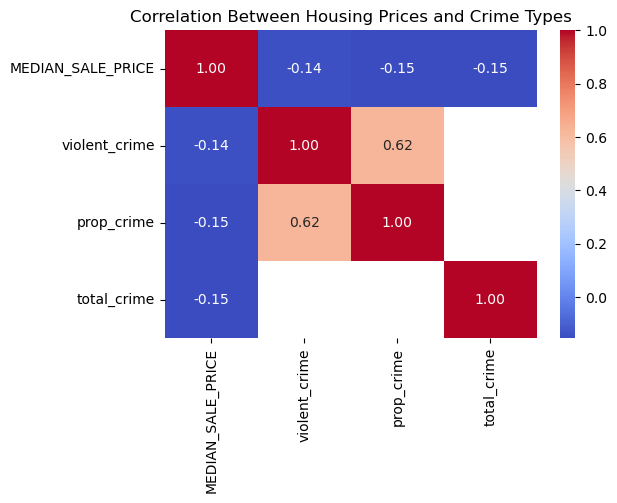

In [21]:
# Clean numeric columns: remove commas and convert to floats
cols_to_fix = ["MEDIAN_SALE_PRICE", "violent_crime", "prop_crime", "total_crime"]
for col in cols_to_fix:
    merged[col] = merged[col].replace({',': '', '\$': ''}, regex=True).astype(float)

# Now create the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    merged[cols_to_fix].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Between Housing Prices and Crime Types")
plt.show()


## How do housing prices relate to crime rates across different cities? 

Correlation between Housing Prices and Crime Rates by City:

MEDIAN_SALE_PRICE    1.000000
violent_crime       -0.260286
prop_crime          -0.305326
total_crime         -0.272340
Name: MEDIAN_SALE_PRICE, dtype: float64


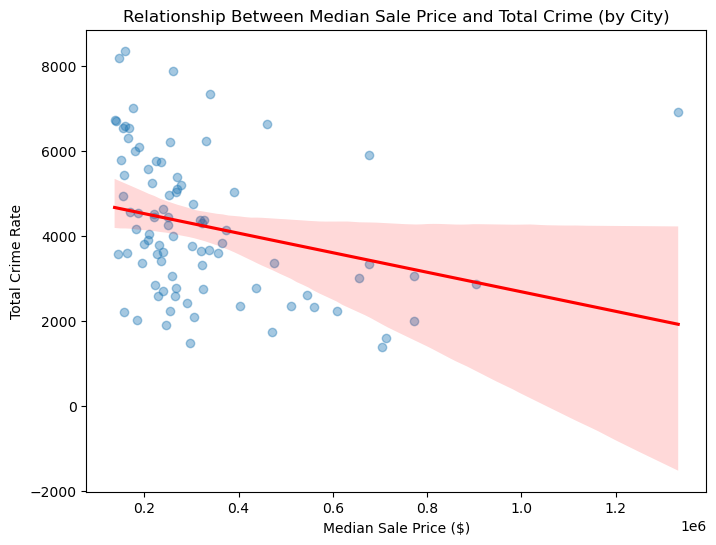

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by city: average housing price and crime rate for each city
city_summary = merged.groupby("CITY")[["MEDIAN_SALE_PRICE", "violent_crime", "prop_crime", "total_crime"]].mean().reset_index()

# Compute correlation values between housing price and crimes
corr_values = city_summary[["MEDIAN_SALE_PRICE", "violent_crime", "prop_crime", "total_crime"]].corr()
print("Correlation between Housing Prices and Crime Rates by City:\n")
print(corr_values["MEDIAN_SALE_PRICE"])

# Visualization: scatterplot for one type of crime
plt.figure(figsize=(8,6))
sns.regplot(data=city_summary, x="MEDIAN_SALE_PRICE", y="total_crime", scatter_kws={"alpha":0.4}, line_kws={"color":"red"})
plt.title("Relationship Between Median Sale Price and Total Crime (by City)")
plt.xlabel("Median Sale Price ($)")
plt.ylabel("Total Crime Rate")
plt.show()
